In [1]:
# This Notebook will be mainly used for the capstone project

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv


--2020-08-31 21:28:28--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  47.0MB/s   in 1.5s   

2020-08-31 21:28:30 (47.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# Simplify table to fields of interest

Collisions = df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
Collisions.head()


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM
0,2,Intersection,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Block,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Block,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Block,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Intersection,Raining,Wet,Daylight,1/28/2004 8:04:00 AM


In [5]:
# Explore attribute data

Collisions.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)


ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [6]:
Collisions.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [7]:
Collisions.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [8]:
Collisions.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

In [9]:
# Convert to date/time, calc day of week

Collisions['INCDTTM'] = pd.to_datetime(Collisions['INCDTTM'])
Collisions['DAYOFWEEK'] = Collisions['INCDTTM'].dt.dayofweek
Collisions.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM,DAYOFWEEK
0,2,Intersection,Overcast,Wet,Daylight,2013-03-27 14:54:00,2
1,1,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2
2,1,Block,Overcast,Dry,Daylight,2004-11-18 10:20:00,3
3,1,Block,Clear,Dry,Daylight,2013-03-29 09:26:00,4
4,2,Intersection,Raining,Wet,Daylight,2004-01-28 08:04:00,2


In [10]:
Collisions.groupby(['DAYOFWEEK'])['SEVERITYCODE'].value_counts(normalize=True)

DAYOFWEEK  SEVERITYCODE
0          1               0.697281
           2               0.302719
1          1               0.694250
           2               0.305750
2          1               0.695705
           2               0.304295
3          1               0.692470
           2               0.307530
4          1               0.704358
           2               0.295642
5          1               0.706196
           2               0.293804
6          1               0.722022
           2               0.277978
Name: SEVERITYCODE, dtype: float64

In [17]:
# One hot encode all of the categorical data and append

CollisionFeature = Collisions[['DAYOFWEEK']]
CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(df['ADDRTYPE']),pd.get_dummies(df['WEATHER']),pd.get_dummies(df['ROADCOND']),pd.get_dummies(df['LIGHTCOND'])], axis=1)
# CollisionFeature = pd.concat([CollisionFeature,pd.get_dummies(df['WEATHER'])], axis=1)
CollisionFeature.head()

,DAYOFWEEK,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [18]:
# Set our feature selection and labels as X and y

X = CollisionFeature
y = Collisions['SEVERITYCODE'].values

In [19]:
# Normalize Data

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-0.48852801, -0.06223095, -1.36876932,  1.41129279, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024, -0.03476509, -0.27267986],
       [-0.48852801, -0.06223095,  0.73058329, -0.70857019, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239,  1.73588509, -0.00751719, -0.1141037 , -1.21604855,
        -0.17682024, -0.03476509, -0.27267986],
       [ 0.03188685, -0.0622

In [40]:
# Split into train and test for model development

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.90)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19467, 33) (19467,)
Test set: (175206, 33) (175206,)


In [24]:
# Try SVM first

from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
SVMyhat = clf.predict(X_test)
SVMyhat [0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 2, 1, 2, 1])

In [36]:
from sklearn.metrics import f1_score
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, SVMyhat))

Logistic Regression's Accuracy:  0.660949785092777


In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNNyhat = neigh.predict(X_test)
KNNyhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNNyhat))

Train set Accuracy:  0.6858463909581299
Test set Accuracy:  0.6757626585595975


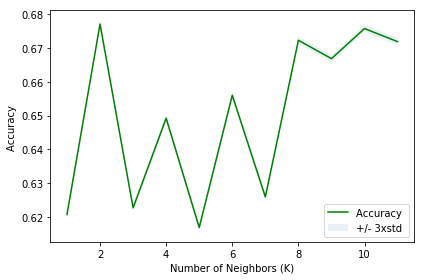

In [27]:
# Optimize K for KNN

from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LRyhat = LR.predict(X_test)
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, LRyhat))

Logistic Regression's Accuracy:  0.7009748524593906


In [42]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy")
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6931098250059929
